In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Reading the data with pandas

In [59]:
df1 = pd.read_csv("Perovskite_Stability_with_features.csv")

In [60]:
df1

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,0,0,0,1,2,23,0,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1


Finding out the null values in the dataframe

In [61]:
df1.isnull().sum().sort_values(ascending = False)

B site #3                                1896
A site #3                                1895
A site #2                                 768
B site #2                                 680
Material Composition                        0
                                         ... 
specific heat capacity_AB_diff              0
at. wt._AB_diff                             0
thermal conductivity_AB_avg                 0
First Ionization Potential (V)_AB_avg       0
Bsite_IsMetal_max                           0
Length: 81, dtype: int64

Dropping columns with null values

In [62]:
df1 = df1.drop(columns=['A site #3', 'B site #3', 'A site #2', 'B site #2'])

Dropping the Material composition column

In [63]:
df1.drop(columns=['Material Composition'], inplace=True)

Dictionary of all unique elements in the dataset

In [64]:
Element_dict = {'Ba': 56, 'Bi':83, 'Ca':20, 'Cd':48, 'Dy':66, 'Gd':64, 'Ho':67, 'La':57, 'Mg':12, 'Nd':60, 'Pr':59,
       'Sm':62, 'Sn':50, 'Sr':38, 'Y':39, 'Ce':58, 'Er':68, 'Zn':30, 'V':23, 'Co':27, 'Fe':26,
       'Ni':28, 'Cr':24, 'Ga':31, 'Mn':25, 'Sc':21, 'Ti':22, 'Zr':40, 'Hf':72, 'Nb':41, 'Ta':73, 'Al':13,
       'Cu':29, 'Ir':77, 'Mo':42, 'Os':76, 'Pd':46, 'Pt':78, 'Re':75, 'Rh':45, 'Ru':44, 'Tc':43, 'Ge':32,
       'Si':14, 'W':74}

In [65]:
df1.head()

,A site #1,B site #1,X site,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba,V,O,4,29.747707,-2.113335,7,136.90,50.9415,650.0,...,0,0,0,0,2,23,0,0,1,1
1,Ba,Co,O,5,106.702335,-1.311863,4,332.63,58.9332,758.0,...,0,0,0,0,2,27,1,0,1,1
2,Ba,Fe,O,4,171.608093,-1.435607,6,154.67,55.8470,759.3,...,0,0,0,0,2,26,0,0,1,1
3,Ba,Ni,O,5,284.898190,-0.868639,4,332.63,58.6934,736.7,...,0,0,0,0,2,28,0,0,1,1
4,Ba,Fe,O,4,270.007913,-1.746806,6,230.00,55.8470,759.3,...,0,0,0,0,2,26,0,0,1,1


In [66]:
df1.drop(columns=['X site'], inplace=True)

In [67]:
df1.shape

(1929, 75)

Converting element strings to their atomic number

In [68]:
df1['A site #1'] = df1['A site #1'].map(Element_dict)

In [69]:
df1['B site #1'] = df1['B site #1'].map(Element_dict)

In [70]:
df1.head()

,A site #1,B site #1,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,56,23,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,...,0,0,0,0,2,23,0,0,1,1
1,56,27,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,...,0,0,0,0,2,27,1,0,1,1
2,56,26,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,...,0,0,0,0,2,26,0,0,1,1
3,56,28,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,...,0,0,0,0,2,28,0,0,1,1
4,56,26,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,...,0,0,0,0,2,26,0,0,1,1


In [71]:
df1.head()

,A site #1,B site #1,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,56,23,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,...,0,0,0,0,2,23,0,0,1,1
1,56,27,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,...,0,0,0,0,2,27,1,0,1,1
2,56,26,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,...,0,0,0,0,2,26,0,0,1,1
3,56,28,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,...,0,0,0,0,2,28,0,0,1,1
4,56,26,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,...,0,0,0,0,2,26,0,0,1,1


In [72]:
cols_to_del = []
for col in df1:
    print(f'{col},{len(df1[col].unique())}')
    if len(df1[col].unique()) < 1:
        cols_to_del.append(col)
cols_to_del

A site #1,15
B site #1,27
Number of elements,4
energy_above_hull (meV/atom),1678
formation_energy (eV/atom),1929
num_of_atoms_host_Asite0,6
host_Asite0_Heat of Vaporization,15
host_Bsite0_at. wt.,27
host_Bsite0_Ionization Energy (kJ/mol),27
shannon_radii_AB_avg,1213
Density_AB_avg,1291
BCCefflatcnt_AB_avg,1847
BCCvolume_padiff_AB_avg,1350
GSenergy_pa_AB_avg,1847
ICSDVolume_AB_avg,1194
covalent radius_AB_avg,487
Ionization Energy (kJ/mol)_AB_avg,1713
Electron Affinity (kJ/mol)_AB_avg,812
Atomic Volume (cm³/mol)_AB_avg,1666
MendeleevNumber_AB_avg,366
First Ionization Potential (V)_AB_avg,1672
thermal conductivity_AB_avg,1752
at. wt._AB_diff,1847
specific heat capacity_AB_diff,1043
electrical conductivity_AB_diff,1046
BCCefflatcnt_AB_ratio,1847
Ionization Energy (kJ/mol)_AB_ratio,1831
Heat of Vaporization_AB_ratio,1831
Asite_BCCvolume_pa_weighted_avg,175
Asite_BCCvolume_padiff_weighted_avg,172
Asite_At. Radius   (angstroms)_weighted_avg,134
Asite_n_ws^third_weighted_avg,95
Bsite_ BP (K)_w

[]

In [73]:
df1.drop(columns=cols_to_del, inplace=True)

In [74]:
df1.head()

,A site #1,B site #1,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,56,23,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,...,0,0,0,0,2,23,0,0,1,1
1,56,27,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,...,0,0,0,0,2,27,1,0,1,1
2,56,26,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,...,0,0,0,0,2,26,0,0,1,1
3,56,28,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,...,0,0,0,0,2,28,0,0,1,1
4,56,26,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,...,0,0,0,0,2,26,0,0,1,1


C:\Users\Tijin\AppData\Local\Temp/ipykernel_29700/1326464702.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

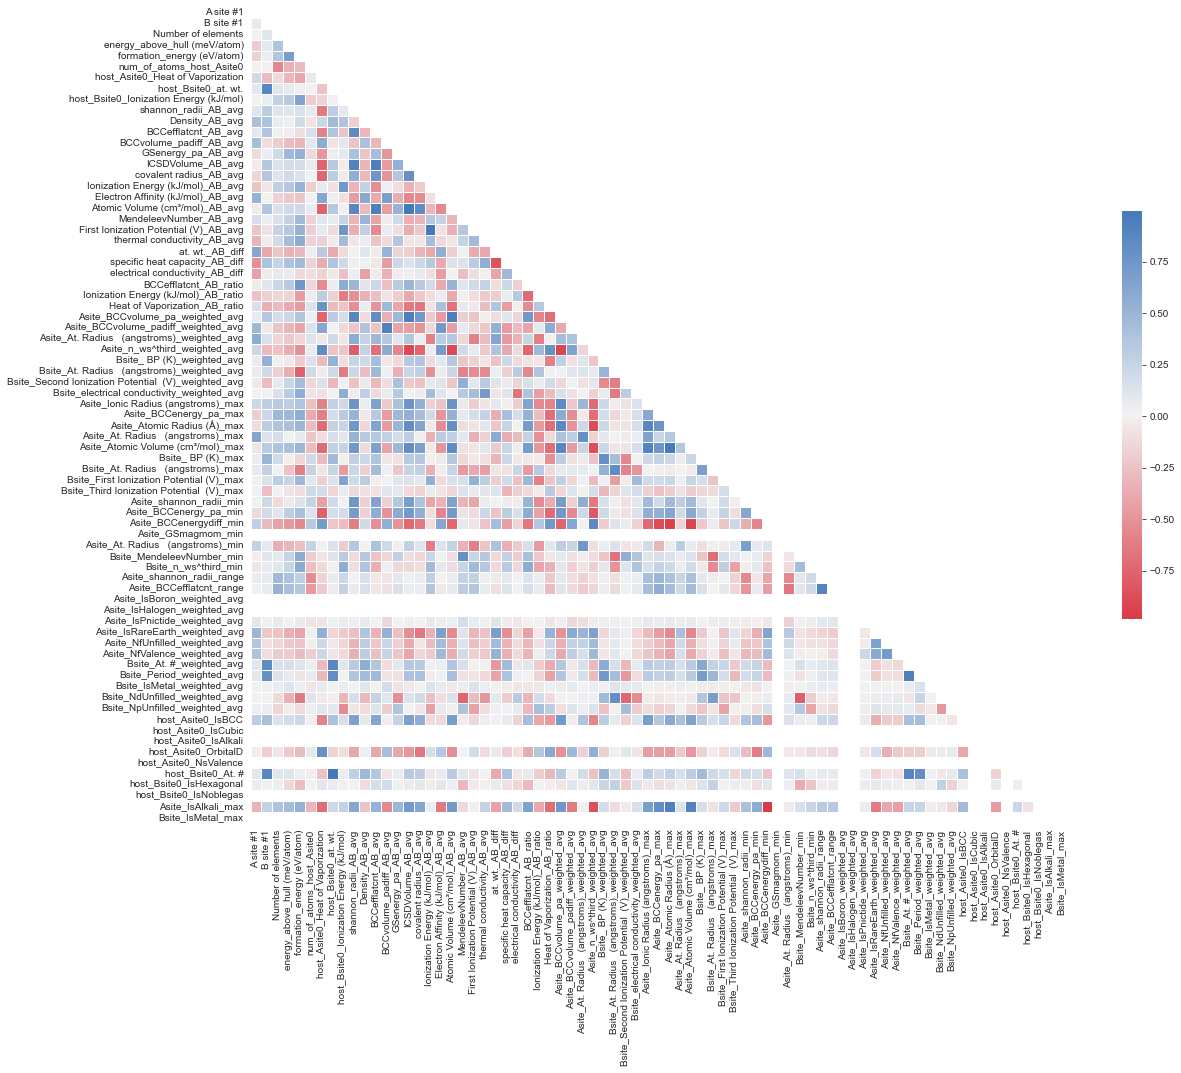

In [75]:
import seaborn as sns
corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [76]:
df1.head()

,A site #1,B site #1,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,56,23,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,...,0,0,0,0,2,23,0,0,1,1
1,56,27,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,...,0,0,0,0,2,27,1,0,1,1
2,56,26,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,...,0,0,0,0,2,26,0,0,1,1
3,56,28,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,...,0,0,0,0,2,28,0,0,1,1
4,56,26,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,...,0,0,0,0,2,26,0,0,1,1


Making a copy of df1 to use minmax scaler which converts all values in the range (0,1)

In [77]:
df2 = df1

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
df2.head()

,A site #1,B site #1,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,0.619718,0.166667,0.333333,0.031090,0.402579,0.8,0.123557,0.155974,0.220195,0.542683,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,1.0,0.0
1,0.619718,0.227273,0.666667,0.111516,0.697197,0.2,0.776643,0.202771,0.548662,0.331707,...,0.0,0.0,0.0,0.0,0.0,0.227273,1.0,0.0,1.0,0.0
2,0.619718,0.212121,0.333333,0.179350,0.651709,0.6,0.182850,0.184699,0.552616,0.542927,...,0.0,0.0,0.0,0.0,0.0,0.212121,0.0,0.0,1.0,0.0
3,0.619718,0.242424,0.666667,0.297752,0.860124,0.2,0.776643,0.201367,0.483881,0.317073,...,0.0,0.0,0.0,0.0,0.0,0.242424,0.0,0.0,1.0,0.0
4,0.619718,0.212121,0.333333,0.282189,0.537313,0.6,0.434201,0.184699,0.552616,0.354878,...,0.0,0.0,0.0,0.0,0.0,0.212121,0.0,0.0,1.0,0.0


Divide into X(features used for prediction) and y(value which has to be predicted)

In [79]:
y = df2['energy_above_hull (meV/atom)']
X = df2.drop(columns=['energy_above_hull (meV/atom)'])

Using linear regression model

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [81]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8019477015853952

In [82]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [83]:
X_train.shape

(1446, 74)

Using tensorflow deeplearning to predict the values

In [84]:
import tensorflow as tf
from tensorflow import keras

Creating the model

In [85]:


model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(74,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

# opt = keras.optimizers.Adam(learning_rate=0.01)


Loss and optimizer

In [86]:
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["mse"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

Fitting the model to training data

In [87]:
model.fit(X_train, y_train, batch_size=64, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
23/23 - 0s - loss: 0.1766 - mse: 0.1766
Epoch 2/10
23/23 - 0s - loss: 0.0355 - mse: 0.0355
Epoch 3/10
23/23 - 0s - loss: 0.0115 - mse: 0.0115
Epoch 4/10
23/23 - 0s - loss: 0.0101 - mse: 0.0101
Epoch 5/10
23/23 - 0s - loss: 0.0089 - mse: 0.0089
Epoch 6/10
23/23 - 0s - loss: 0.0082 - mse: 0.0082
Epoch 7/10
23/23 - 0s - loss: 0.0077 - mse: 0.0077
Epoch 8/10
23/23 - 0s - loss: 0.0072 - mse: 0.0072
Epoch 9/10
23/23 - 0s - loss: 0.0068 - mse: 0.0068
Epoch 10/10
23/23 - 0s - loss: 0.0064 - mse: 0.0064


In [88]:

model.evaluate(X_test, y_test, batch_size=64, verbose=2)

8/8 - 0s - loss: 0.0065 - mse: 0.0065


[0.0065130810253322124, 0.0065130810253322124]